# AUC Walkthrough

In [10]:
# Documentation example

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
X, y = load_breast_cancer(return_X_y=True)
clf = LogisticRegression(solver="liblinear", random_state=0).fit(X, y)
roc_auc_score(y, clf.predict_proba(X)[:, 1])

0.9946488029173934

In [11]:
roc_auc_score(y, clf.decision_function(X))

0.9946488029173934

In [48]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

Automatically created module for IPython interactive environment


In [37]:

y_test[:, i]

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0])

In [38]:
y_score[:, i]

array([ 0.12386354, -0.16612302, -0.32055874,  0.02199789, -0.71889214,
       -0.05859016, -0.79111998, -0.57199363, -0.38933694, -0.27510839,
       -0.27995197,  0.02530178, -0.13456902, -0.45918364, -0.20023832,
       -0.56980985, -0.24297128, -0.31370595, -0.39090964,  0.03129167,
       -0.21423788, -0.51922684,  0.04121338, -0.41072849, -0.12051204,
       -0.57704892, -0.86493066, -0.21682409, -0.49997476, -0.11058011,
       -0.22759345,  0.02046723, -0.45379557, -0.00375631,  0.10106561,
       -0.34020065, -0.41776502,  0.12967625, -0.54610377, -0.35901924,
       -0.30065047, -0.181261  ,  0.00856393, -0.2292247 , -0.2039252 ,
       -0.05831557, -0.01186087,  0.21326435, -0.23302033,  0.58423201,
       -0.39404258, -0.32086131,  0.00767521, -0.50550427, -0.21298739,
       -0.10551977, -0.30613086, -0.07455313, -0.27802284, -0.21662877,
       -0.28317657, -0.47754831, -0.3755452 , -0.10238744, -0.1693745 ,
       -0.3995789 , -0.12075396,  0.41477557, -0.44616888, -0.35

In [13]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [9]:
fpr

{0: array([0.        , 0.        , 0.        , 0.01851852, 0.01851852,
        0.03703704, 0.03703704, 0.05555556, 0.05555556, 0.07407407,
        0.07407407, 0.09259259, 0.09259259, 0.12962963, 0.12962963,
        0.14814815, 0.14814815, 0.2037037 , 0.2037037 , 0.27777778,
        0.27777778, 1.        ]),
 1: array([0.        , 0.        , 0.        , 0.02222222, 0.02222222,
        0.11111111, 0.11111111, 0.17777778, 0.17777778, 0.2       ,
        0.2       , 0.24444444, 0.24444444, 0.26666667, 0.26666667,
        0.37777778, 0.37777778, 0.42222222, 0.42222222, 0.48888889,
        0.48888889, 0.55555556, 0.55555556, 0.62222222, 0.62222222,
        0.64444444, 0.64444444, 0.66666667, 0.66666667, 0.73333333,
        0.73333333, 0.75555556, 0.75555556, 0.88888889, 0.88888889,
        1.        ]),
 2: array([0.        , 0.        , 0.        , 0.01960784, 0.01960784,
        0.07843137, 0.07843137, 0.09803922, 0.09803922, 0.11764706,
        0.11764706, 0.1372549 , 0.1372549 , 0.15686

In [10]:
tpr

{0: array([0.        , 0.04761905, 0.14285714, 0.14285714, 0.19047619,
        0.19047619, 0.33333333, 0.33333333, 0.38095238, 0.38095238,
        0.61904762, 0.61904762, 0.66666667, 0.66666667, 0.76190476,
        0.76190476, 0.9047619 , 0.9047619 , 0.95238095, 0.95238095,
        1.        , 1.        ]),
 1: array([0.        , 0.03333333, 0.13333333, 0.13333333, 0.16666667,
        0.16666667, 0.2       , 0.2       , 0.26666667, 0.26666667,
        0.33333333, 0.33333333, 0.4       , 0.4       , 0.43333333,
        0.43333333, 0.5       , 0.5       , 0.56666667, 0.56666667,
        0.6       , 0.6       , 0.63333333, 0.63333333, 0.7       ,
        0.7       , 0.73333333, 0.73333333, 0.9       , 0.9       ,
        0.93333333, 0.93333333, 0.96666667, 0.96666667, 1.        ,
        1.        ]),
 2: array([0.        , 0.04166667, 0.125     , 0.125     , 0.25      ,
        0.25      , 0.29166667, 0.29166667, 0.33333333, 0.33333333,
        0.41666667, 0.41666667, 0.5       , 0.5    

# My Implementation

In [108]:
from module4.ebc_scoring import EBCScoring
from module4.auc import AUC

In [109]:
a = AUC()
trials, seed_test_sets = a.ingest_data()

In [110]:

test_sets = [i[1] for i in seed_test_sets]

In [103]:

test_sets[0]

Drug-Gene  Drug-Gene Cluster  \
2394                    (flecainide/cyp2d6)               28.0   
2511                  (theophylline/cyp2e1)                9.0   
3386                     (gemcitabine/rrm1)               10.0   
3220                  (aldosterone/cyp11b1)               20.0   
1507                      (dicoumarol/nqo1)               12.0   
1528                     (estradiol/ugt1a1)               14.0   
2112                     (tamoxifen/cyp2d6)               17.0   
1305                      (thiotepa/cyp2b6)               23.0   
2567                     (ritonavir/cyp2d6)               28.0   
2074                      (dantrolene/ryr1)               10.0   
1098                    (omeprazole/cyp3a4)                0.0   
2221                     (flutamide/cyp1a2)                9.0   
2839                     (clozapine/cyp2d6)               17.0   
3197                 (voriconazole/cyp2c19)               17.0   
47                     (mitoxantrone/abcg2)               15.0   
3070                     (naltrexone/oprm1)               23.0   
2089                      (dasatinib/epha2)               27.0   
39                         (cetuximab/egfr)                7.0   
1869                    (omeprazole/cyp1a1)               29.0   
2581                     (ezetimibe/statin)                2.0   
408                        (protamine/tfpi)               20.0   
2426         (norepinephrine/phospholipase)               29.0   
561                       (rapamycin/aicar)                2.0   
2777                        (etodolac/il-1)                2.0   
1895                     (pertuzumab/her-2)                7.0   
1884                       (ketamine/hsp70)               20.0   
2455                     (resveratrol/pkm2)                8.0   
2452             (methylprednisolone/il-10)                8.0   
2389                    (capecitabine/her2)                2.0   
1152                  (amitriptyline/eaat3)               23.0   
545                       (urokinase/pai-2)               28.0   
2336                     (hyaluronan/habp1)                6.0   
774                          (gm-csf/stat1)                1.0   
3077                     (gemfibrozil/inos)               12.0   
613                      (ticagrelor/p2y12)                0.0   
609                        (carnitine/crat)               20.0   
2333                       (menadione/sod1)               10.0   
1640  (corticosteroids/adrenocorticotropin)               27.0   

                                     Dependency Path  Dependency path Cluster  \
2394                                             NaN                      NaN   
2511                                             NaN                      NaN   
3386                                             NaN                      NaN   
3220                                             NaN                      NaN   
1507                                             NaN                      NaN   
1528                                             NaN                      NaN   
2112                                             NaN                      NaN   
1305                                             NaN                      NaN   
2567                                             NaN                      NaN   
2074                                             NaN                      NaN   
1098                          [nn, expression, amod]                     26.0   
2221                                             NaN                      NaN   
2839                                             NaN                      NaN   
3197                                             NaN                      NaN   
47                          [amod, activator, appos]                     94.0   
3070                                             NaN                      NaN   
2089                                             NaN                      NaN   
3

In [93]:

trials

[{'(cetuximab,egfr)': 3325,
  '(mitoxantrone,abcg2)': 3407,
  '(protamine,tfpi)': 3505,
  '(urokinase,pai-2)': 3391,
  '(rapamycin,aicar)': 3507,
  '(carnitine,crat)': 3474,
  '(ticagrelor,p2y12)': 3248,
  '(gm-csf,stat1)': 3377,
  '(omeprazole,cyp3a4)': 3493,
  '(amitriptyline,eaat3)': 3466,
  '(thiotepa,cyp2b6)': 3466,
  '(dicoumarol,nqo1)': 3507,
  '(estradiol,ugt1a1)': 3356,
  '(corticosteroids,adrenocorticotropin)': 3483,
  '(omeprazole,cyp1a1)': 3509,
  '(ketamine,hsp70)': 3499,
  '(pertuzumab,her-2)': 3256,
  '(dantrolene,ryr1)': 3327,
  '(dasatinib,epha2)': 3497,
  '(tamoxifen,cyp2d6)': 3270,
  '(flutamide,cyp1a2)': 3499,
  '(menadione,sod1)': 3482,
  '(hyaluronan,habp1)': 3425,
  '(capecitabine,her2)': 3461,
  '(flecainide,cyp2d6)': 3274,
  '(norepinephrine,phospholipase)': 3508,
  '(methylprednisolone,il-10)': 3504,
  '(resveratrol,pkm2)': 3509,
  '(theophylline,cyp2e1)': 3489,
  '(ritonavir,cyp2d6)': 3177,
  '(ezetimibe,statin)': 3453,
  '(etodolac,il-1)': 3511,
  '(clozapin

In [80]:
testset2 = seed_test_sets[2][1]
ground_truth = dict(zip(testset2['Drug-Gene'], testset2['DrugBank']))
in_drugbank = {i.replace("/",","): j for i, j in ground_truth.items() if j}
in_drugbank

{'(riluzole,cyp1a2)': True,
 '(dapsone,cyp2c9)': True,
 '(theophylline,cyp2e1)': True,
 '(ciprofloxacin,parc)': True,
 '(aripiprazole,cyp3a4)': True,
 '(troglitazone,cyp1a1)': True,
 '(trimetrexate,dhfr)': True,
 '(rosiglitazone,pparg)': True,
 '(alemtuzumab,cd52)': True,
 '(flurbiprofen,cyp2c9)': True,
 '(fluvoxamine,cyp3a4)': True,
 '(terfenadine,cyp3a4)': True}

In [91]:
from sklearn.metrics import auc

# Getting the ROC curve for 1 trial
test = trials[2]

# Getting lowest and highest scores for the particular run
start = min(test.values()) 
end = max(test.values())

tp_rates = []
fp_rates = []

# We are saying for a particular boundary value, if the value is higher, 
for boundary in range(start, end, 2):
    # Split the current testset on the boundary
    y_pred = [1 if j >= boundary else 0 for i, j in test.items()]
    y_true = [1 if i in in_drugbank else 0 for i, j in test.items()]
    tpr, fpr = a.calculate_TP_FP_rate(y_true, y_pred)
    tp_rates.append(tpr)
    fp_rates.append(fpr)
    


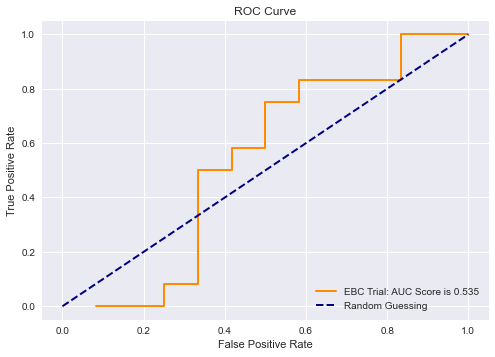

In [92]:

plt.style.use("seaborn")

# Plotting the ROC curve
plt.figure()
plt.plot(fp_rates, tp_rates, color='darkorange',
         lw=2, label = f"EBC Trial: AUC Score is {round(auc(fp_rates, tp_rates),3)}")
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label = "Random Guessing")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Test Set Size: ')
plt.legend(loc="lower right")
plt.show()

In [83]:
from sklearn.metrics import auc

auc(fp_rates, tp_rates)

0.5347222222222223

## Entire Run with Main Function



Test Set Size: 38


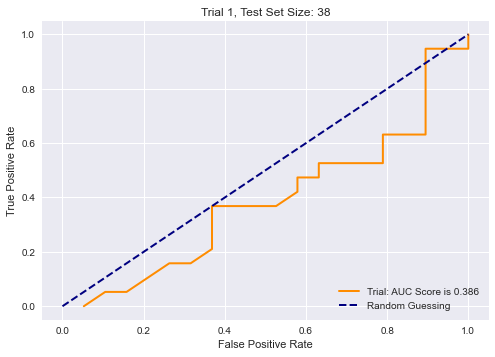

Test Set Size: 28


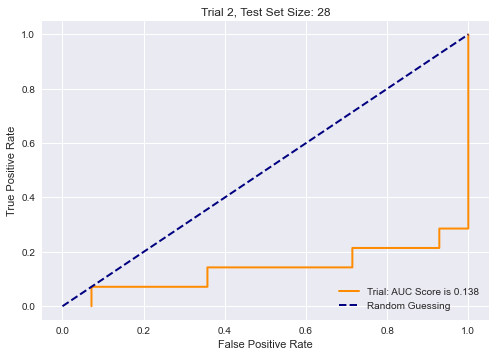

Test Set Size: 24


Test Set Size: 18


Test Set Size: 24


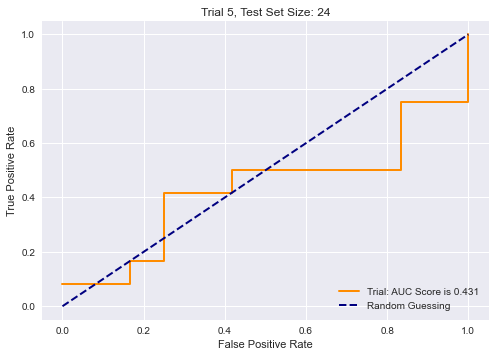

Test Set Size: 14


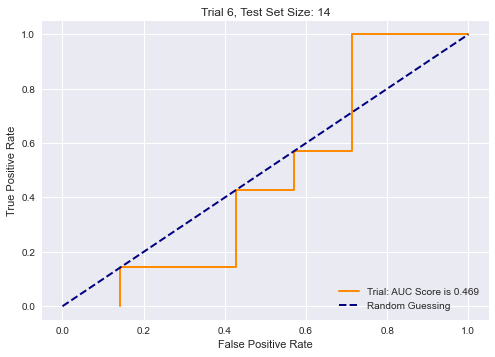

Test Set Size: 42


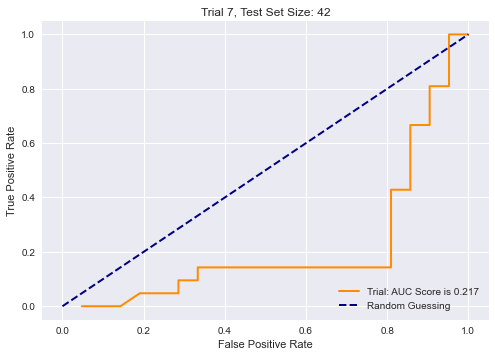

Test Set Size: 16


Test Set Size: 44


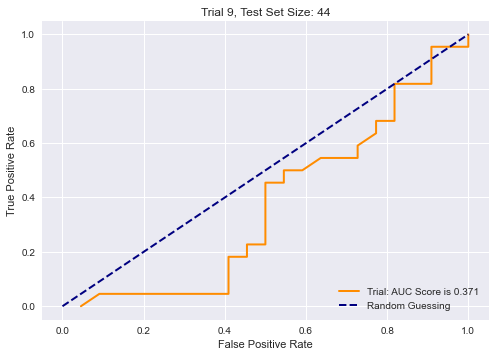

Test Set Size: 16


Test Set Size: 32


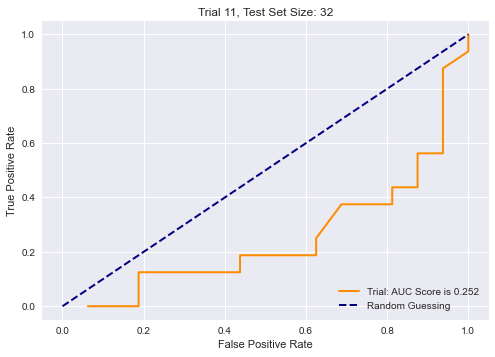

Test Set Size: 38


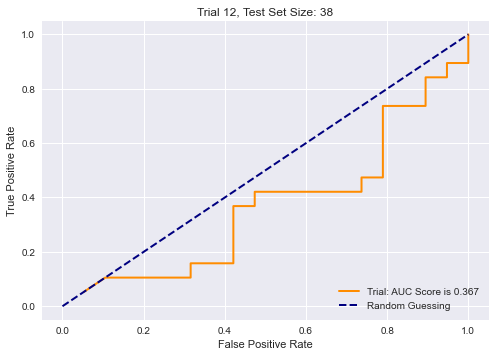

Test Set Size: 10


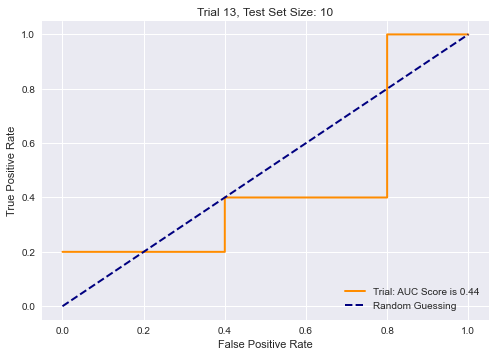

Test Set Size: 34


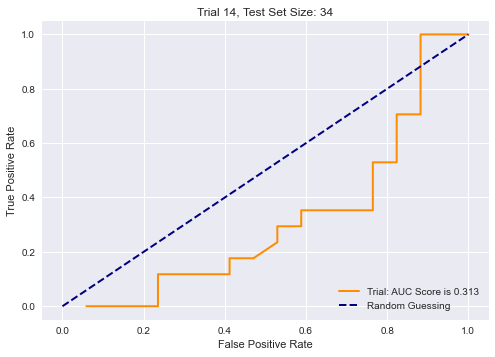

Test Set Size: 14


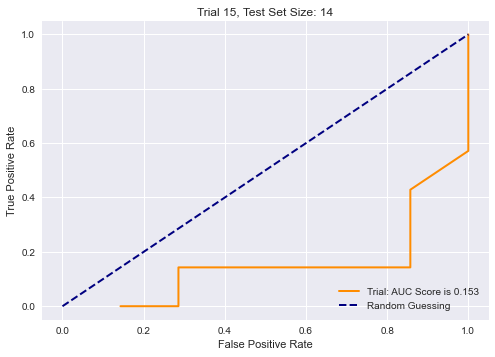

Test Set Size: 48


Test Set Size: 20


Test Set Size: 26


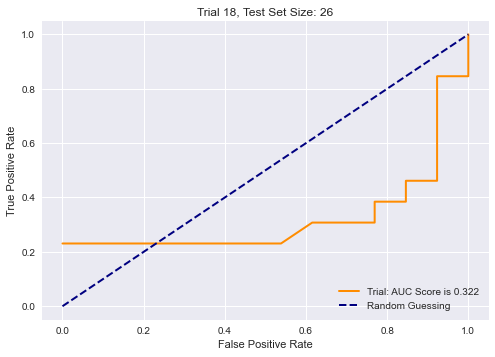

Test Set Size: 42


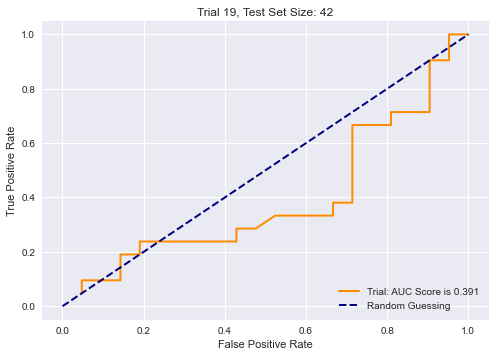

Test Set Size: 44


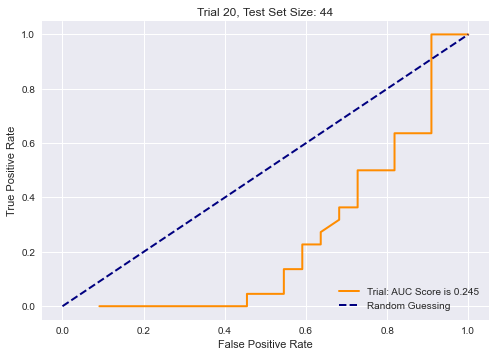

Test Set Size: 16


Test Set Size: 34


Test Set Size: 34


Test Set Size: 48


Test Set Size: 46


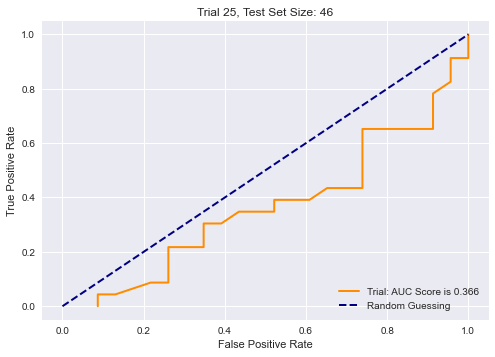

Test Set Size: 40


Test Set Size: 18


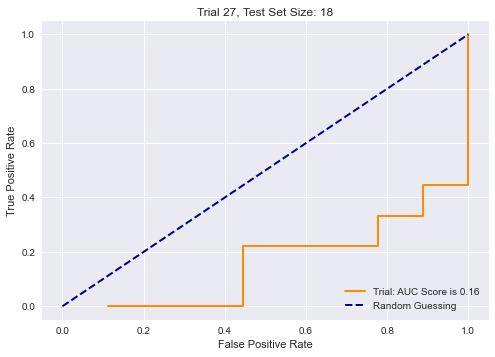

Test Set Size: 14


Test Set Size: 34


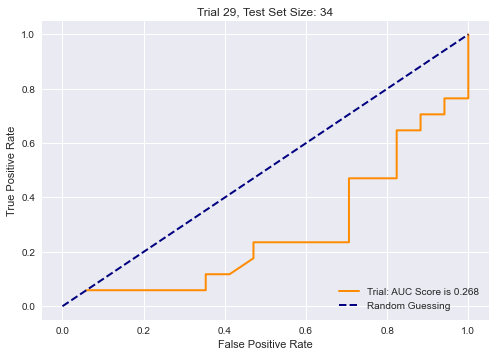

Test Set Size: 48


Test Set Size: 40


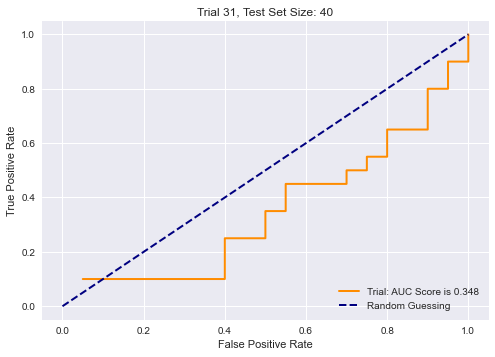

Test Set Size: 24


Test Set Size: 38


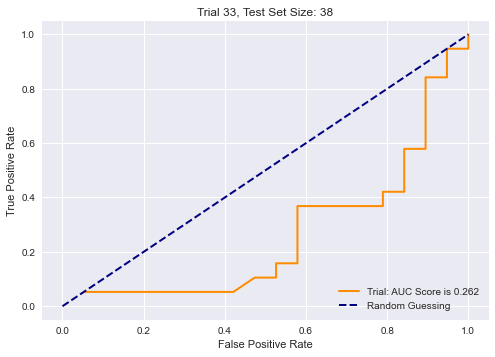

Test Set Size: 30


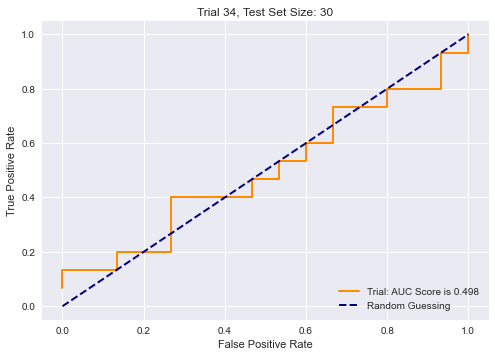

Test Set Size: 38


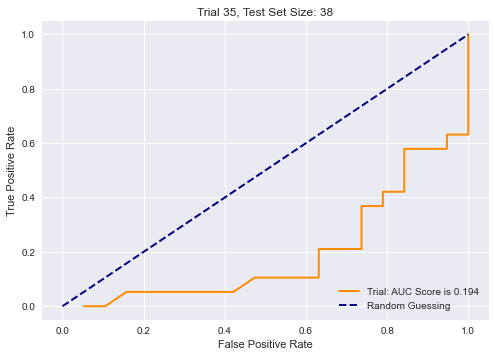

Test Set Size: 10


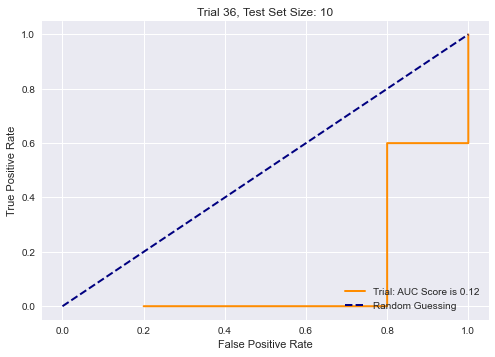

Test Set Size: 18


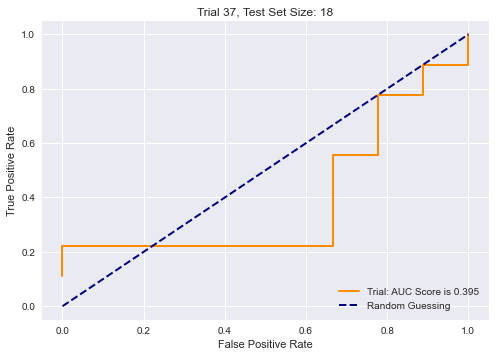

Test Set Size: 36


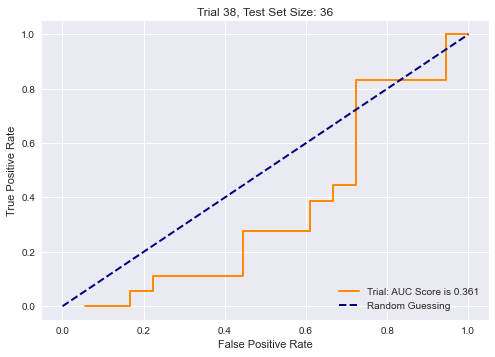

Test Set Size: 44


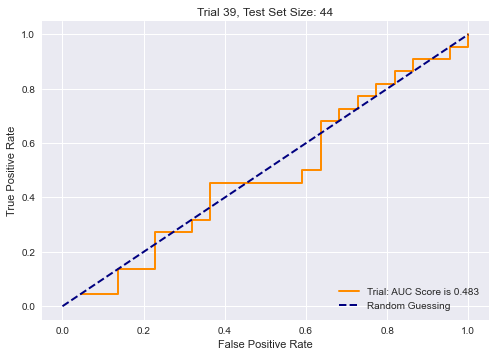

Test Set Size: 10


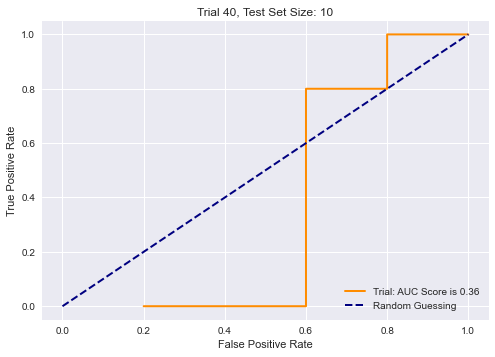

Test Set Size: 30


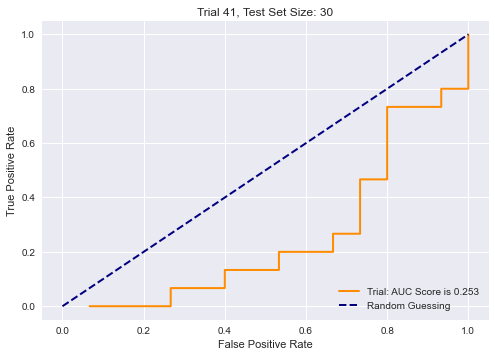

Test Set Size: 32


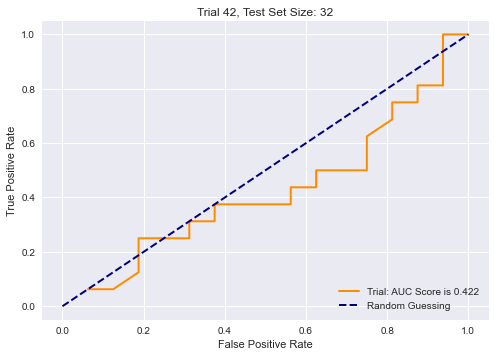

Test Set Size: 14


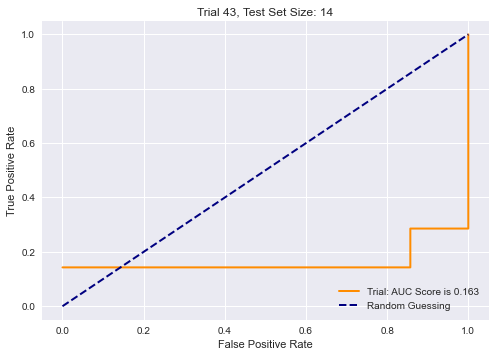

Test Set Size: 20


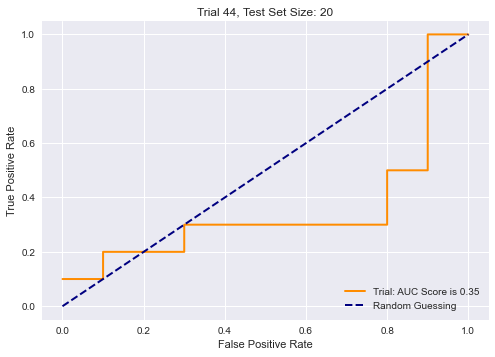

Test Set Size: 20


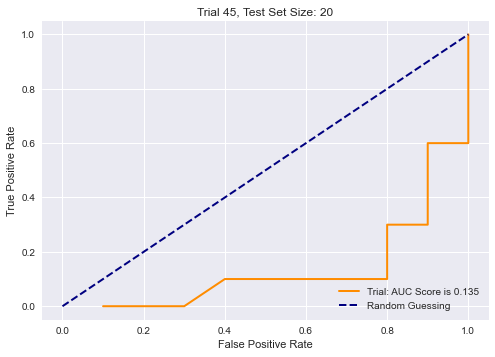

Test Set Size: 12


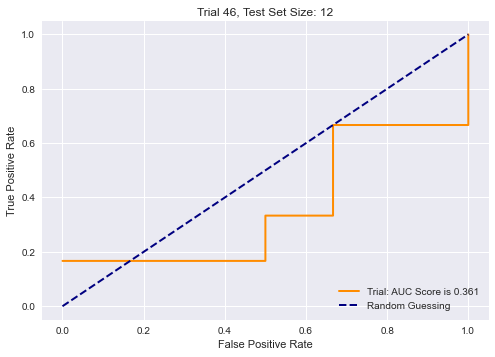

Test Set Size: 22


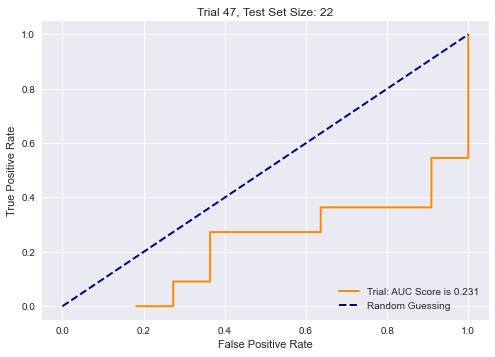

Test Set Size: 36


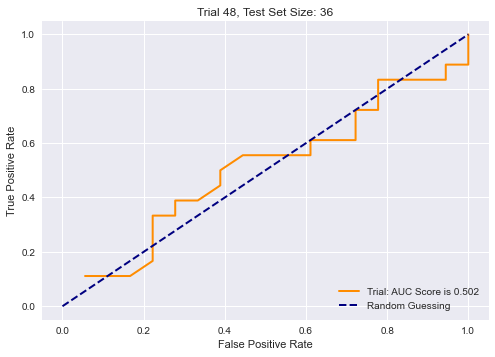

Test Set Size: 14


Test Set Size: 22


Test Set Size: 42


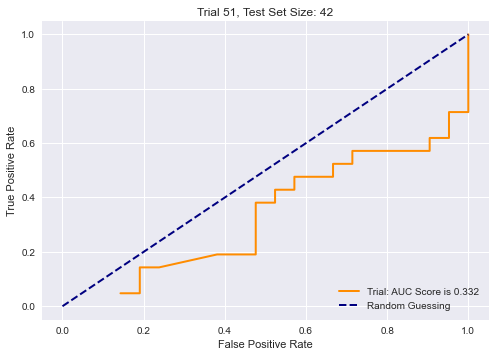

Test Set Size: 44


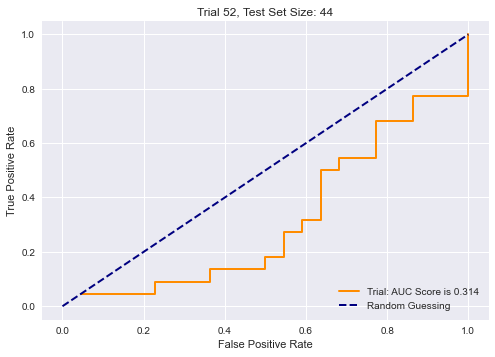

Test Set Size: 16


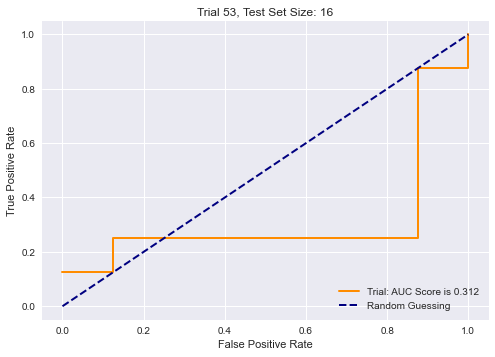

Test Set Size: 30


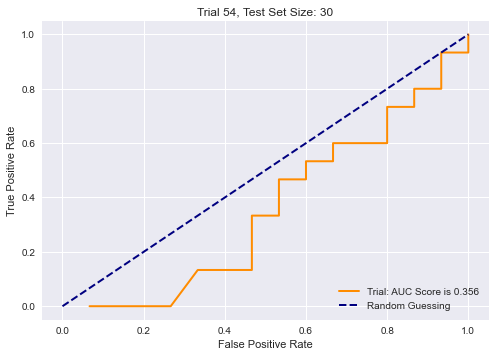

Test Set Size: 42


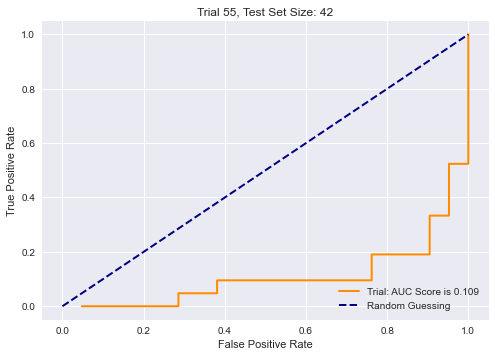

Test Set Size: 12


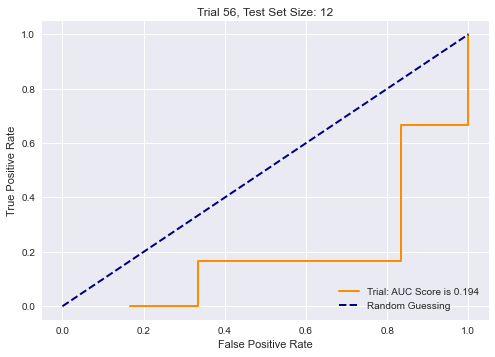

Test Set Size: 16


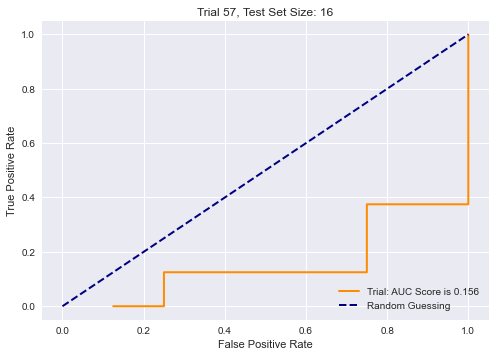

Test Set Size: 44


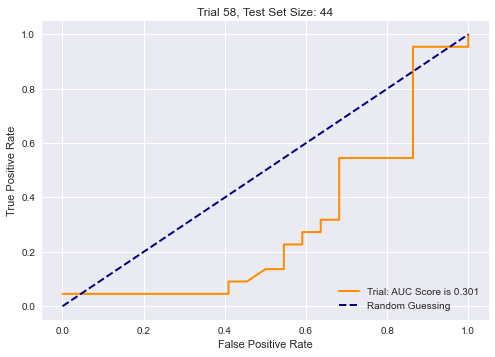

Test Set Size: 30


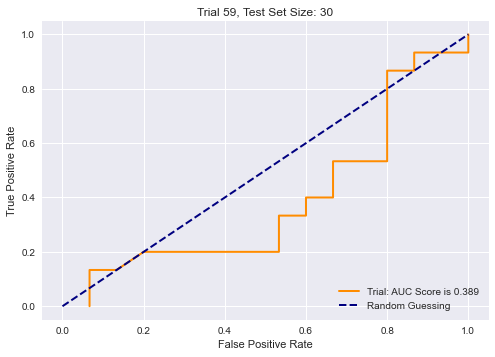

Test Set Size: 44


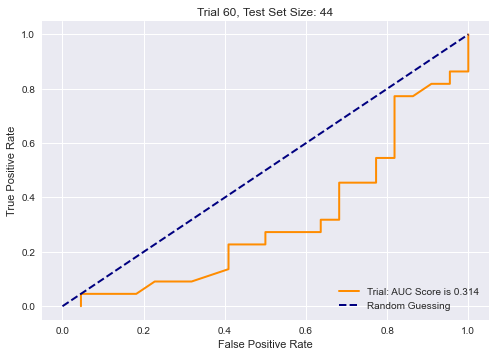

Test Set Size: 10


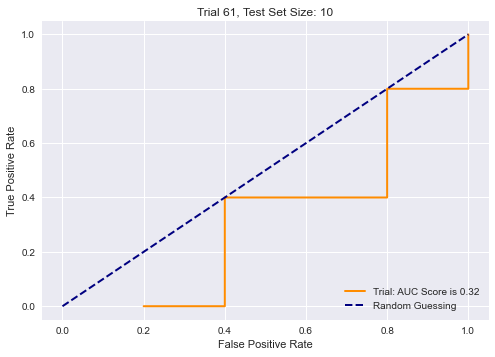

Test Set Size: 12


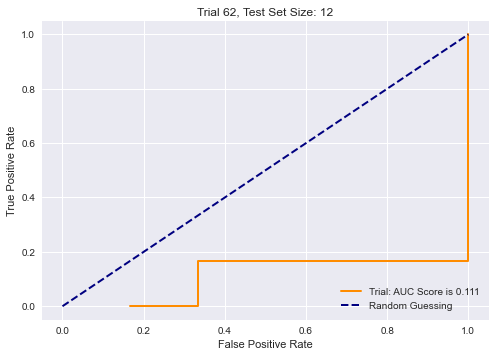

Test Set Size: 44


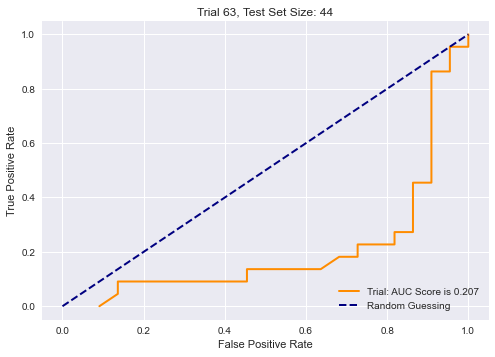

Test Set Size: 12


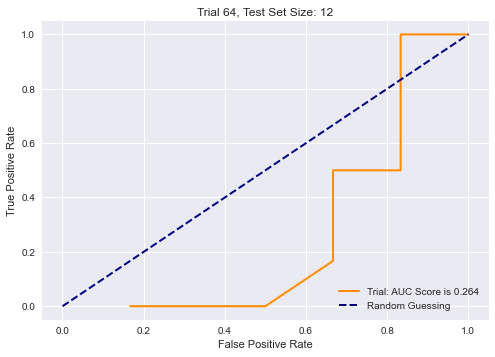

Test Set Size: 18


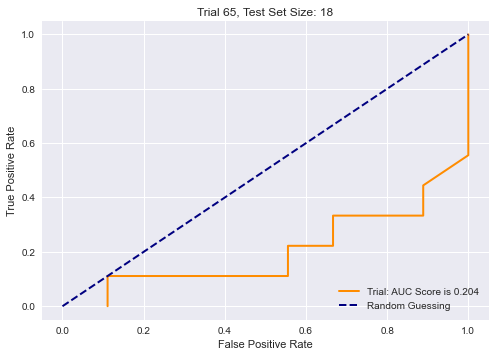

Test Set Size: 16


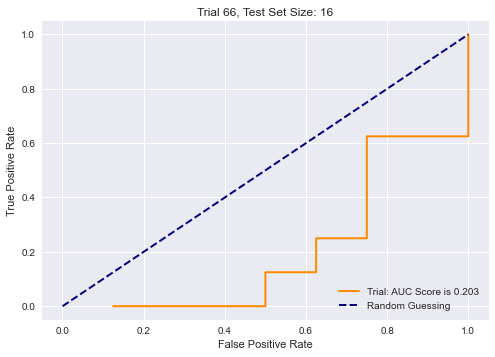

Test Set Size: 28


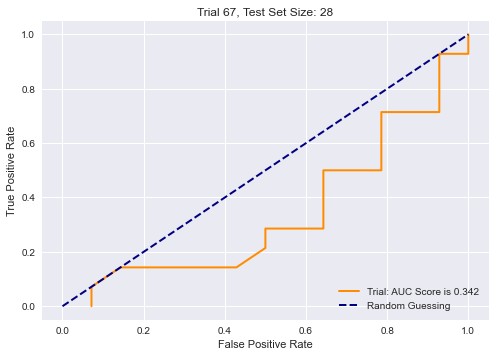

Test Set Size: 24


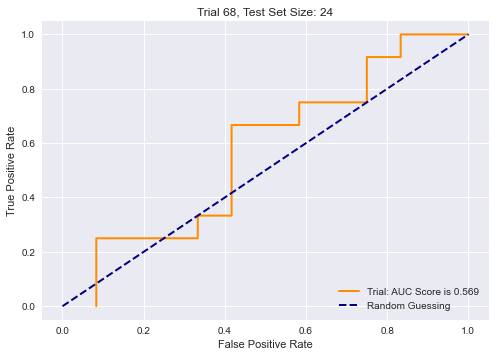

Test Set Size: 20


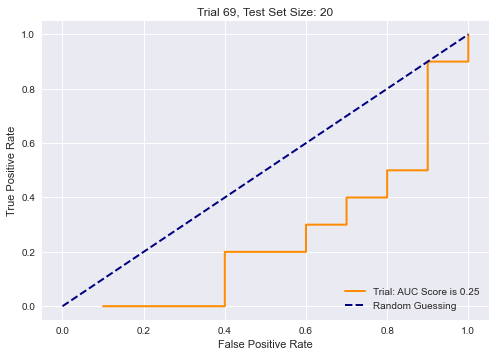

Test Set Size: 20


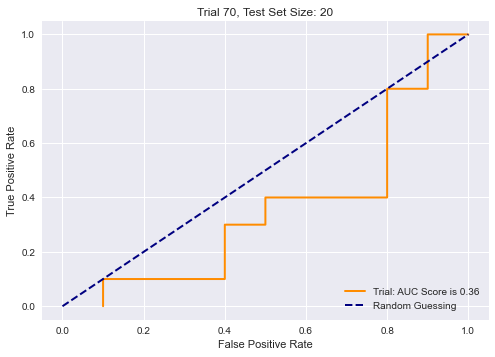

Test Set Size: 18


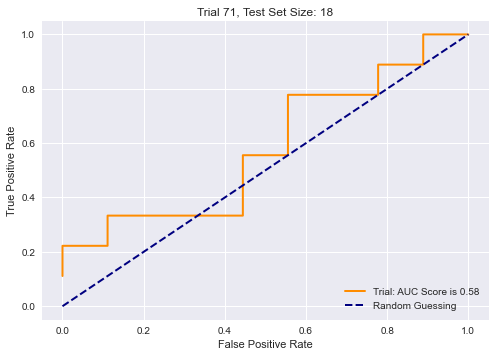

Test Set Size: 32


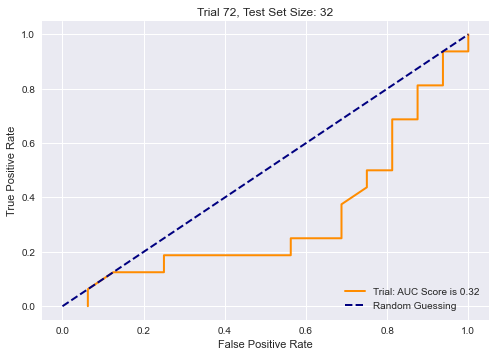

Test Set Size: 40


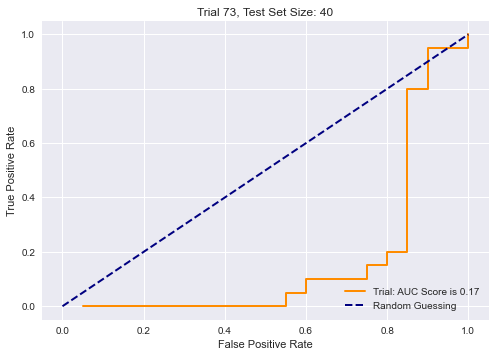

Test Set Size: 24


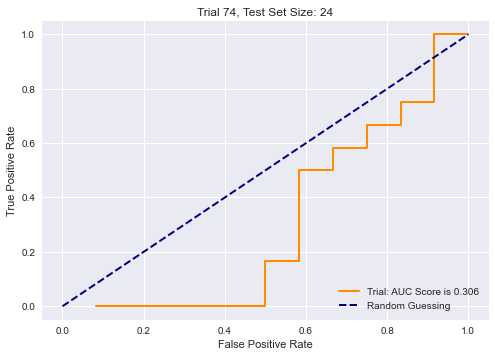

Test Set Size: 20


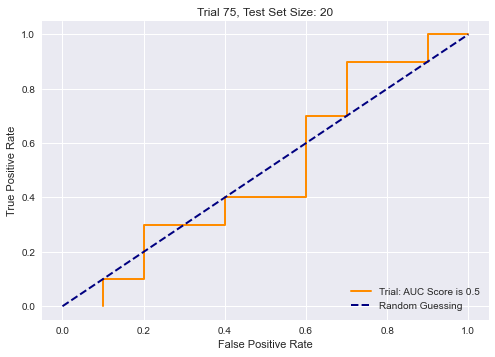

Test Set Size: 24


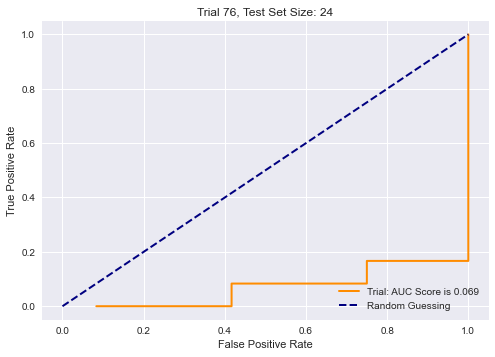

Test Set Size: 48


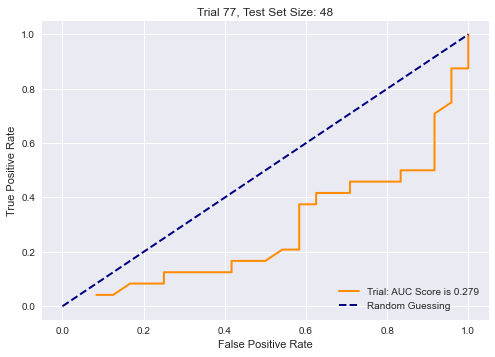

Test Set Size: 44


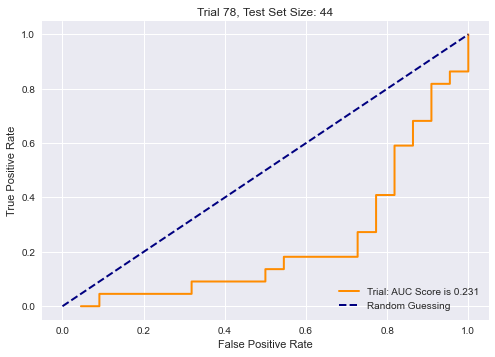

Test Set Size: 10


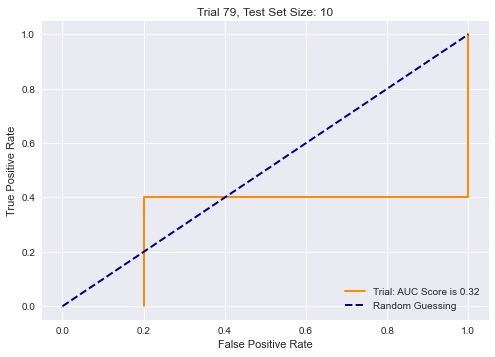

Test Set Size: 26


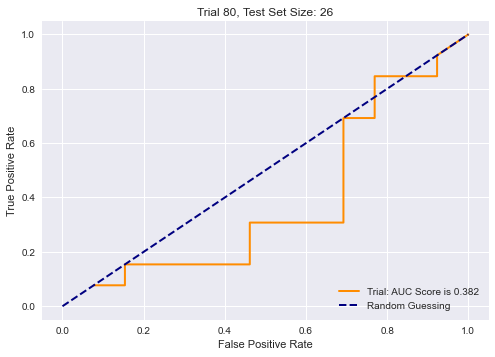

Test Set Size: 22


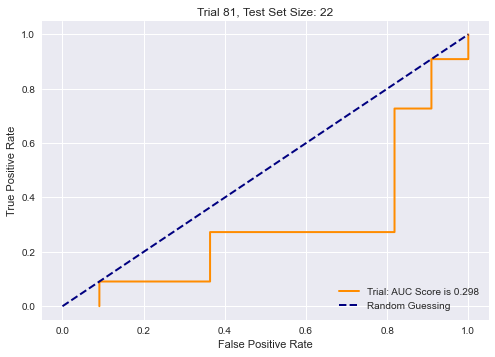

Test Set Size: 38


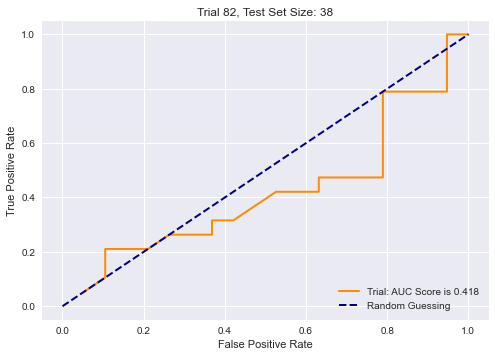

Test Set Size: 26


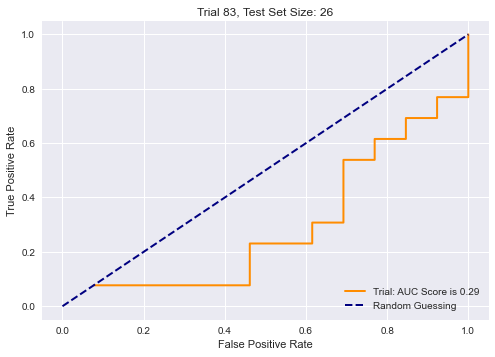

Test Set Size: 28


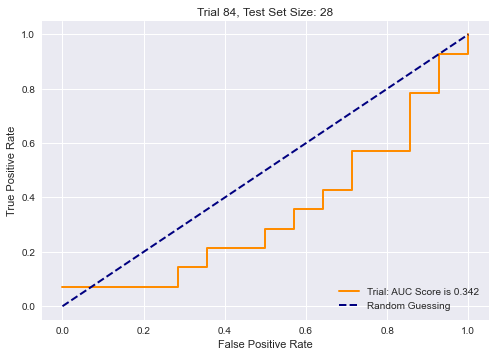

Test Set Size: 10


Test Set Size: 44


Test Set Size: 30


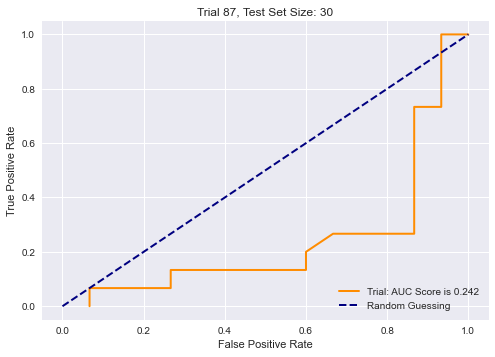

Test Set Size: 34


Test Set Size: 22


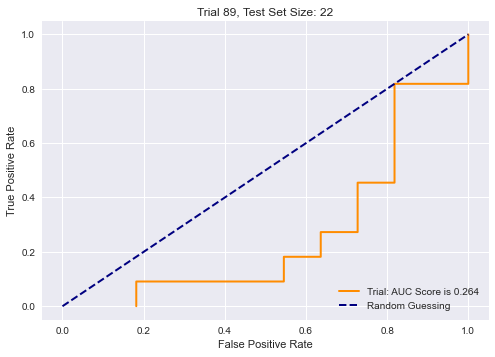

Test Set Size: 28


Test Set Size: 10


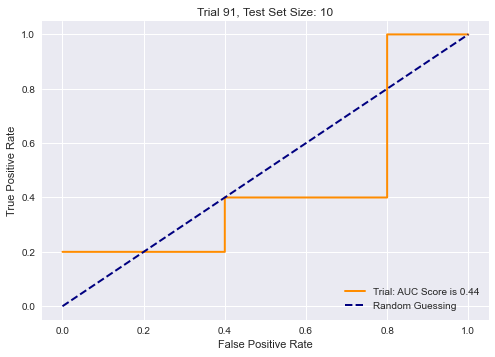

Test Set Size: 48


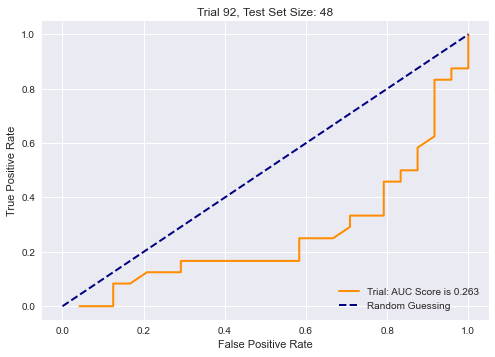

Test Set Size: 10


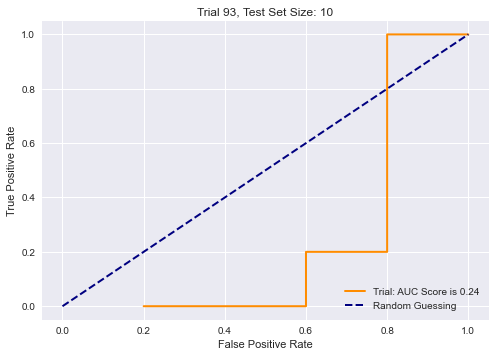

Test Set Size: 32


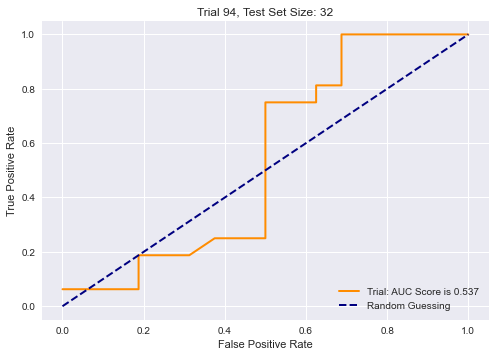

Test Set Size: 36


Test Set Size: 34


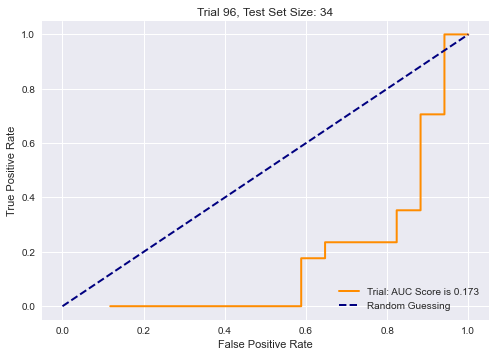

Test Set Size: 20


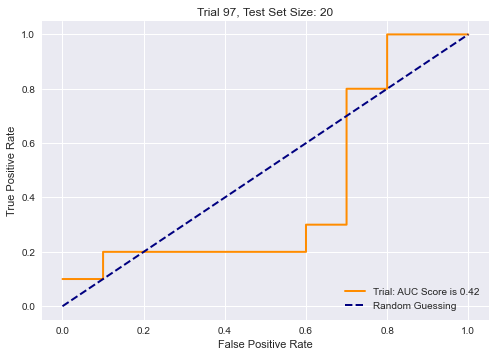

Test Set Size: 14


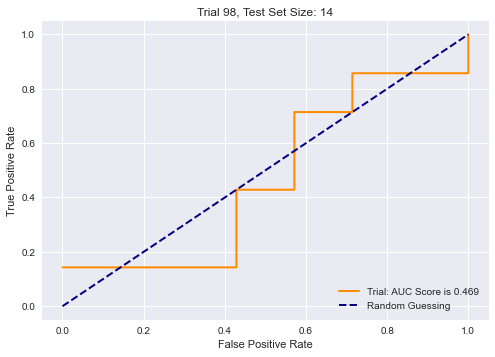

Test Set Size: 42


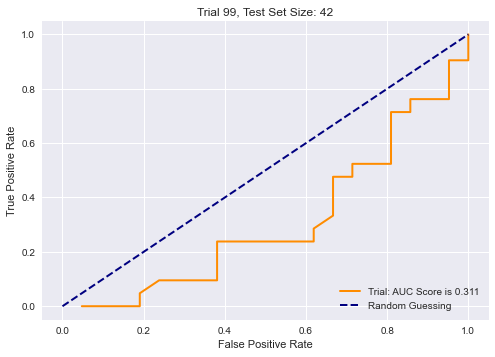

Test Set Size: 12


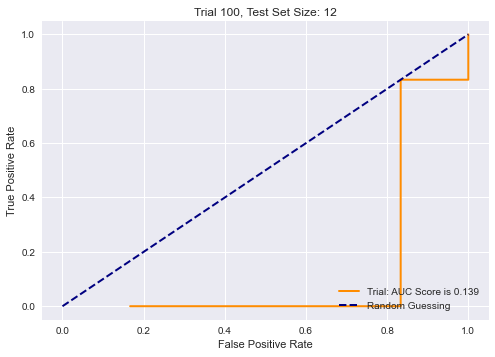

REPORT
Proportion of trials with AUC > 0.7: 0.0


In [5]:
from module4.ebc_scoring import EBCScoring
from module4.auc import AUC

a = AUC()
test_set_sizes = a.main()

In [7]:

test_set_sizes

[38,
 28,
 24,
 18,
 24,
 14,
 42,
 16,
 44,
 16,
 32,
 38,
 10,
 34,
 14,
 48,
 20,
 26,
 42,
 44,
 16,
 34,
 34,
 48,
 46,
 40,
 18,
 14,
 34,
 48,
 40,
 24,
 38,
 30,
 38,
 10,
 18,
 36,
 44,
 10,
 30,
 32,
 14,
 20,
 20,
 12,
 22,
 36,
 14,
 22,
 42,
 44,
 16,
 30,
 42,
 12,
 16,
 44,
 30,
 44,
 10,
 12,
 44,
 12,
 18,
 16,
 28,
 24,
 20,
 20,
 18,
 32,
 40,
 24,
 20,
 24,
 48,
 44,
 10,
 26,
 22,
 38,
 26,
 28,
 10,
 44,
 30,
 34,
 22,
 28,
 10,
 48,
 10,
 32,
 36,
 34,
 20,
 14,
 42,
 12]

In [13]:

from module4.visualize import Visualize

v = Visualize()
v.onedim_distplot(test_set_sizes, title = "Distribution of Test and Seed Set Sizes in 100 EBC Trial Run")

One dim distplot displayed...
